In [ ]:
import json
import os
import pandas as pd

PROJECT_ROOT_DIR = '.'
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "DA_data")
TRAINING_PATH = os.path.join(DATA_PATH,"training")
TEST_PATH = os.path.join(DATA_PATH, "testing")



In [ ]:
json_files = os.listdir(TRAINING_PATH)
sensor_values_rows = []
dataF = pd.DataFrame(columns=['station1', 'station2','station3','station4','station5','signature','label'])

for json_file in json_files:
    with open((TRAINING_PATH+"/"+json_file), 'r') as f:
        data = json.load(f)
        label = json_file[:3]
        signature = data['signature']

        for value in data['payload']['values']:

            dataF.loc[len(dataF)] = [value[0], value[1],value[2],value[3],value[4],signature, label]
            
dataF.to_csv("data-train.csv")

    


In [ ]:
json_files = os.listdir(TEST_PATH)
sensor_values_rows = []
dataF = pd.DataFrame(columns=['station1', 'station2','station3','station4','station5','signature','label'])

for json_file in json_files:
    with open((TEST_PATH+"/"+json_file), 'r') as f:
        data = json.load(f)
        label = json_file[:3]
        signature = data['signature']

        for value in data['payload']['values']:

            dataF.loc[len(dataF)] = [value[0], value[1],value[2],value[3],value[4],signature, label]
            
dataF.to_csv("data-test.csv")

    


## Acquiring data

In [57]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import signal
import numpy as np
data = pd.read_csv("data-train.csv")
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('signature', axis=1)
data.head()
df = data.copy()
df_avg = data.copy()


<Axes: >

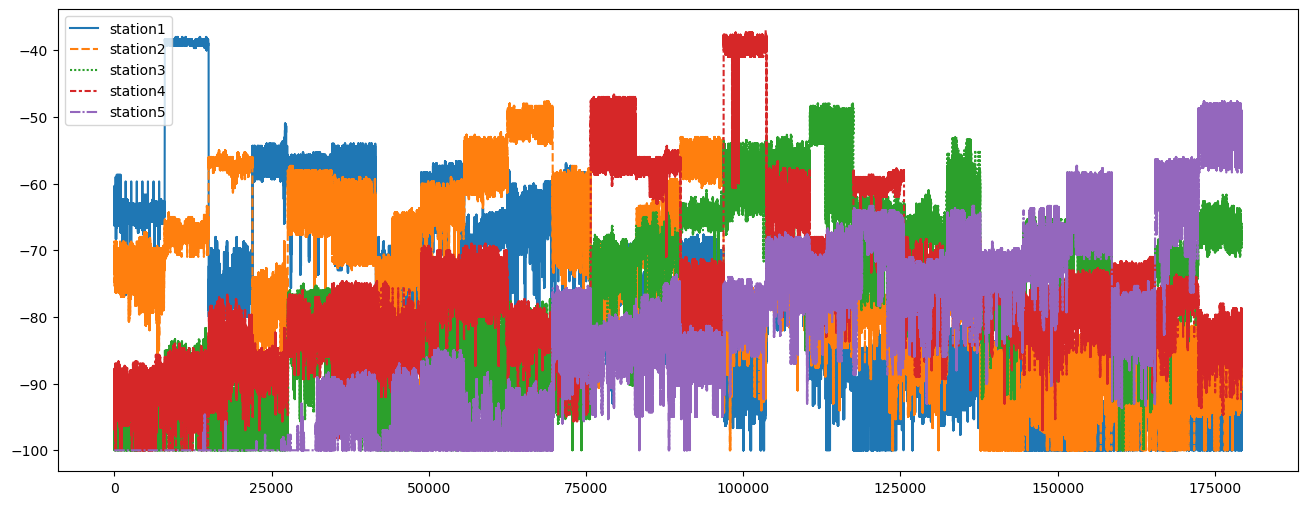

In [2]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df)

In [58]:
df_by_labels= {}
x = df_avg.groupby('label').label.count()
for label in x.index:
    df_by_labels[label] = (df_avg.loc[df.label==label])

TypeError: unsupported operand type(s) for -: 'tuple' and 'tuple'

In [59]:
def distance2d(p1, p2):
    dt = np.power(((p2[0] - p1[0]) + (p2[1] - p1[1])), 2)
    return np.sqrt(dt)


def l2Distance(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    x1, y1 = np.array(x1), np.array(y1)
    x2, y2 = np.array(x2), np.array(y2)

    dx = (x2 - x1)**2
    dy = (y2 - y1)**2
    dist = np.sqrt(dx+dy)
    return np.mean(dist), dist

In [60]:
coordinates = {'station1': (13.64, 1.90),
                'station2': (9.31, 4.09),
                'station3': (4.50, 4.59),
                'station4': (6.05, 0.15),
                'station5': (0.29, 4.42),
                '0,0': (14.14, 0.),
                '1,0': (12.28, 0.),
                '2,0': (10.42, 0.),
                '3,0': (8.56, 0.),
                '4,0': (6.7, 0.),
                '5,0': (4.84, 0.),
                '6,0': (2.98, 0.),
                '7,0': (1.12, 0.),
                '0,1': (14.14, 2.),
                '1,1': (12.28, 2.),
                '2,1': (10.42, 2.),
                '3,1': (8.56, 2.),
                '4,1': (6.7, 2.),
                '5,1': (4.84, 2.),
                '6,1': (2.98, 2.),
                '7,1': (1.12, 2.),
                '0,2': (14.14, 4.),
                '1,2': (12.28, 4.),
                '2,2': (10.42, 4.),
                '3,2': (8.56, 4.),
                '4,2': (6.7, 4.),
                '5,2': (4.84, 4.),
                '6,2': (2.98, 4.),
                '7,2': (1.12, 4.),
                '1,3': (12.28, 6.),
                '2,3': (10.42, 6.),}


#Dataframe to fill with coordinates

df_avg['x'] = df_avg['label']
df_avg['y'] = df_avg['label']
df_avg = df_avg.drop('label', axis=1)

df_avg['x'] = df_avg.x.map(lambda x: coordinates[x][0])
df_avg['y'] = df_avg.y.map(lambda x: coordinates[x][1])


<Axes: ylabel='station1'>

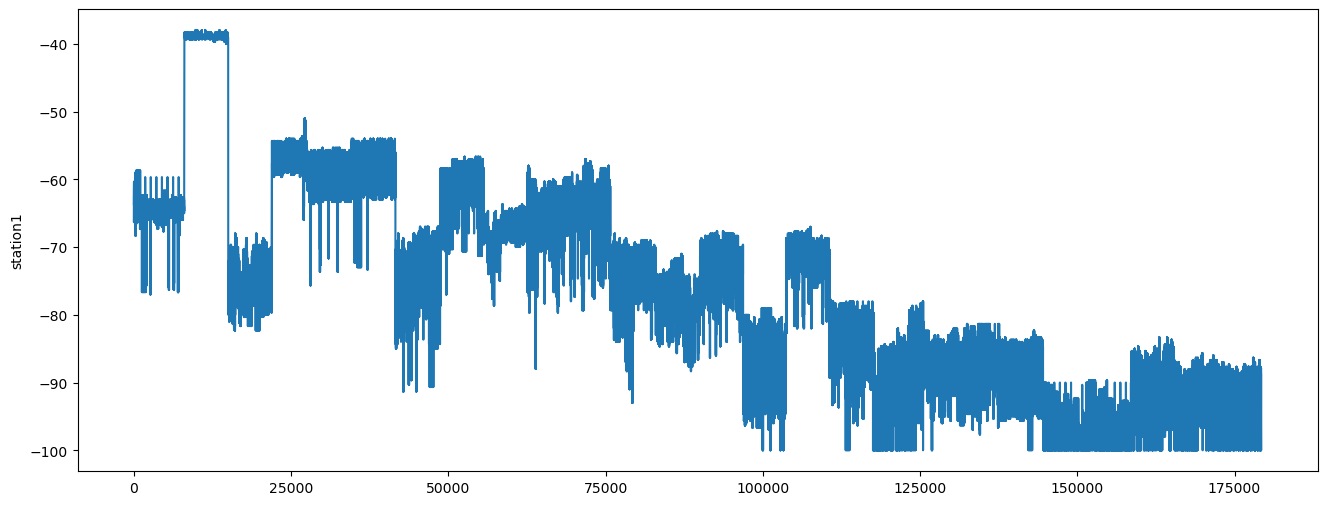

In [5]:
plt.figure(figsize=(16,6))

sns.lineplot(data=df.station1)

In [61]:
TW = 20
NX = 2
df_avg.station1 = df.station1.rolling(TW, min_periods=NX).mean()
df_avg.station2 = df.station2.rolling(TW, min_periods=NX).mean()
df_avg.station3 = df.station3.rolling(TW, min_periods=NX).mean()
df_avg.station4 = df.station4.rolling(TW, min_periods=NX).mean()
df_avg.station5 = df.station5.rolling(TW, min_periods=NX).mean()
df_avg = df_avg.dropna()


In [62]:
df_station1 = df_avg.drop(['station2' ,'station3', 'station4', 'station5'], axis=1)
df_station1['rssi'] = df_avg.station1
df_station1 = df_station1.drop('station1', axis=1)

df_station2 = df_avg.drop(['station1' ,'station3', 'station4', 'station5'], axis=1)
df_station2['rssi'] = df_avg.station2
df_station2 = df_station2.drop('station2', axis=1)

df_station3 = df_avg.drop(['station1' ,'station2', 'station4', 'station5'], axis=1)
df_station3['rssi'] = df_avg.station3
df_station3 = df_station3.drop('station3', axis=1)

df_station4 = df_avg.drop(['station1' ,'station2', 'station3', 'station5'], axis=1)
df_station4['rssi'] = df_avg.station4
df_station4 = df_station4.drop('station4', axis=1)

df_station5 = df_avg.drop(['station1' ,'station2', 'station3', 'station4'], axis=1)
df_station5['rssi'] = df_avg.station5
df_station5 = df_station5.drop('station5', axis=1)

concat = pd.concat([df_station1.assign(station='station1'),
                    df_station2.assign(station='station2'),
                    df_station3.assign(station='station3'),
                    df_station4.assign(station='station4'), 
                    df_station5.assign(station='station5')], ignore_index=True)


<Figure size 2400x600 with 0 Axes>

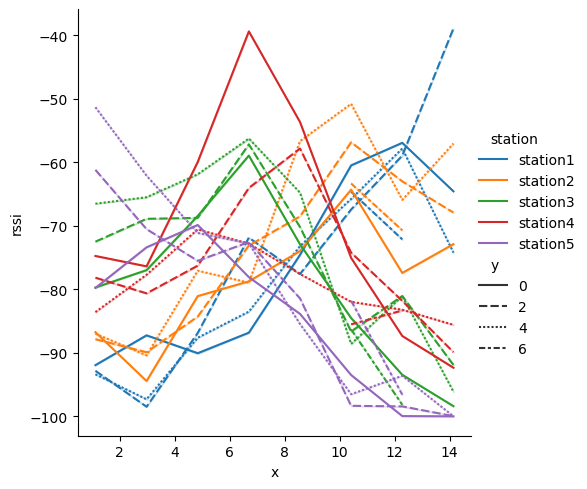

In [8]:
plt.figure(figsize=(24,6))

sns.relplot(data=concat, x='x', y='rssi', hue='station', kind='line', style='y')

<Figure size 2400x600 with 0 Axes>

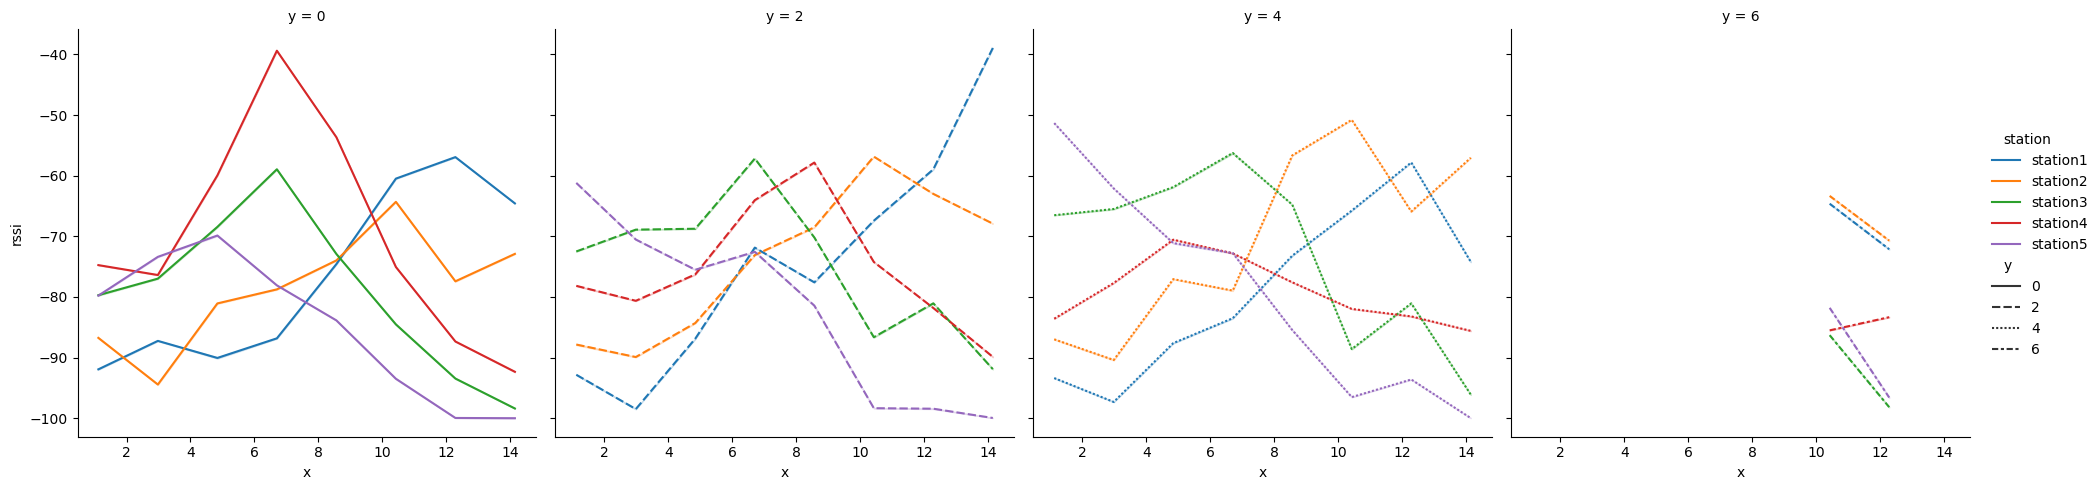

In [9]:
plt.figure(figsize=(24,6))

sns.relplot(data=concat, x='x', y='rssi', hue='station', kind='line', col='y', style='y')

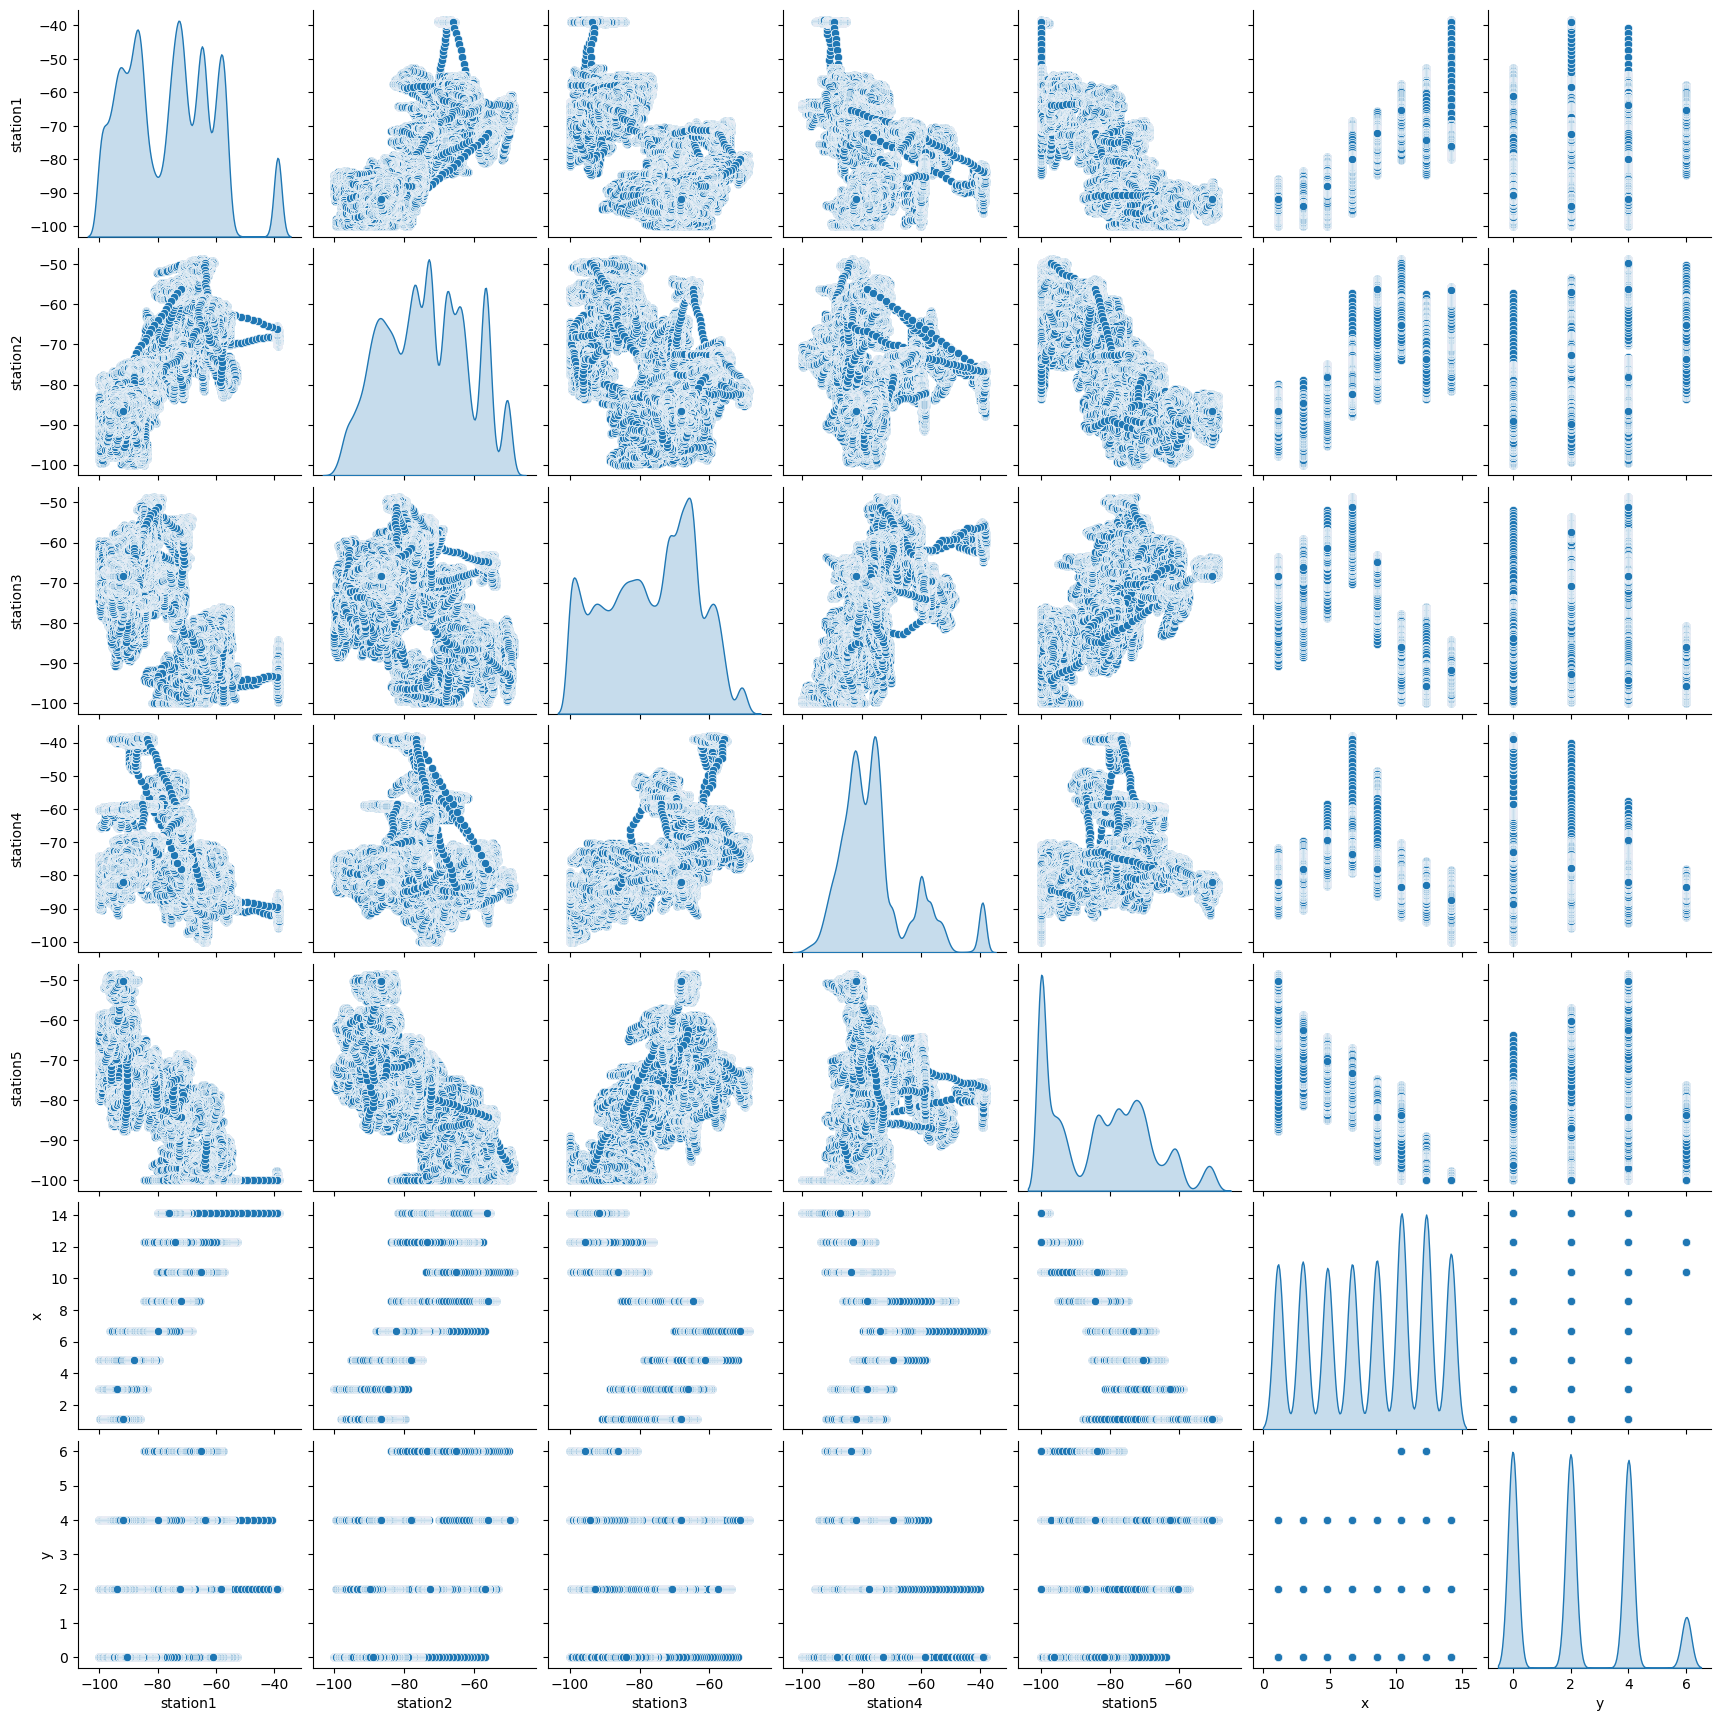

In [10]:
sns.pairplot(df_avg, diag_kind='kde')

<Axes: >

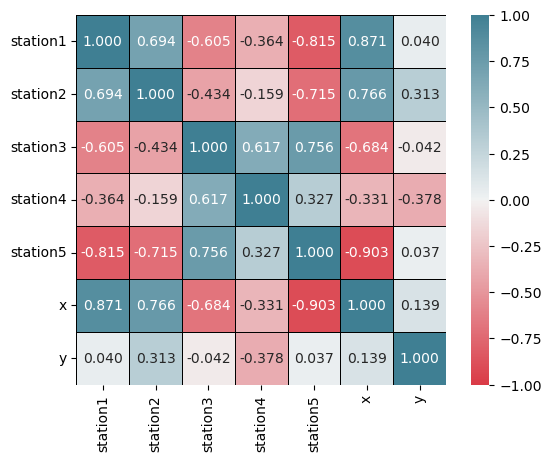

In [20]:
corr_mat = df_avg.corr()
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(
    data=corr_mat, 
    vmin=-1.0, 
    vmax=1.0, 
    center=0, 
    cmap=cmap, 
    square=True,
    linewidths=0.5, 
    linecolor='k',
    annot=True, 
    fmt='.3f',
)

In [21]:
train_avg = df_avg.sample(frac=0.8, random_state=42)
test_avg = df_avg.drop(train_avg.index)

<Axes: >

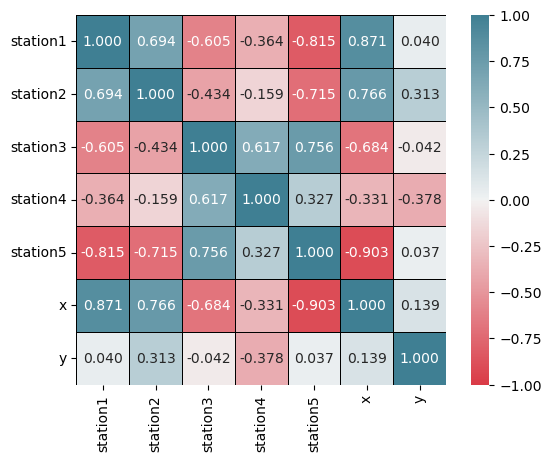

In [22]:
corr_mat2 = train_avg.corr()
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(
    data=corr_mat, 
    vmin=-1.0, 
    vmax=1.0, 
    center=0, 
    cmap=cmap, 
    square=True,
    linewidths=0.5, 
    linecolor='k',
    annot=True, 
    fmt='.3f',
)

In [23]:
train_avg.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
station1,143391.0,-76.012792,14.855199,-100.00,-88.616667,-74.900000,-64.750000,-38.416667
station2,143391.0,-73.774036,11.995869,-100.00,-83.633333,-73.683333,-64.550000,-48.616667
station3,143391.0,-76.866418,13.021478,-100.00,-87.500000,-75.466667,-66.333333,-48.700000
station4,143391.0,-75.443880,12.100459,-100.00,-83.366667,-77.650000,-72.483333,-37.900000
station5,143391.0,-82.676593,14.077894,-100.00,-97.166667,-82.166667,-72.250000,-48.566667
x,143391.0,7.940182,4.239029,1.12,4.840000,8.560000,12.280000,14.140000
y,143391.0,2.271300,1.891414,0.00,0.000000,2.000000,4.000000,6.000000


# Traning Models

### Data split into train and test

In [63]:
train_x_avg = train_avg.drop(['x', 'y'], axis=1)
train_y_avg = train_avg.drop(['station1', 'station2', 'station3', 'station4','station5'], axis=1)
test_x_avg = test_avg.drop(['x', 'y'], axis=1)
test_y_avg = test_avg.drop(['station1', 'station2', 'station3', 'station4','station5'], axis=1)


In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import ensemble
from sklearn.metrics import r2_score, mean_squared_error


0.6811833714794229

## Linear Regression

In [90]:
modelLR = LinearRegression()
modelLR.fit(train_x_avg, train_y_avg)
pred = modelLR.predict(test_x_avg)
print('R2 Score: ', r2_score(test_y_avg, pred))

R2 Score:  0.6811833714794229


In [91]:
distLR_mean, distancesLR = l2Distance((test_y_avg['x'].values, test_y_avg['y'].values), (pred[:,0], pred[:,1]))
print('Media de las distancias entre predicciones y valores reales',distLR_mean)

Media de las distancias entre predicciones y valores reales 1.6408501984073454


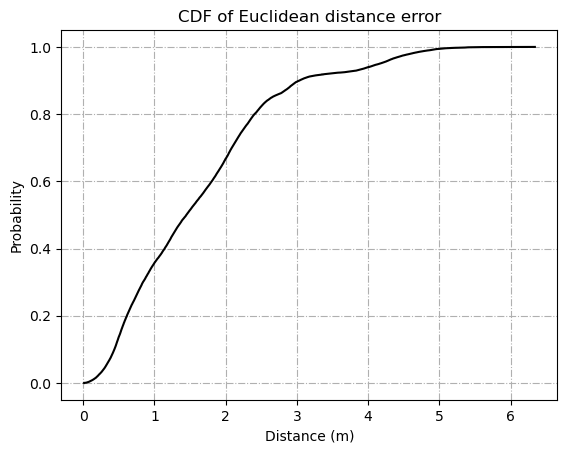

In [73]:
sortedl2_LR = np.sort(distancesLR)
prob_deep = 1. * np.arange(len(sortedl2_LR))/(len(sortedl2_LR) - 1)
fig, ax = plt.subplots()
lg1, = ax.plot(sortedl2_LR, prob_deep, color='black')
plt.title('CDF of Euclidean distance error')
plt.xlabel('Distance (m)')
plt.ylabel('Probability')
plt.grid(True)
gridlines = ax.get_xgridlines() + ax.get_ygridlines()
for line in gridlines:
    line.set_linestyle('-.')


## KNN Regressor

In [98]:
modelKNNR = KNeighborsRegressor()
modelKNNR.fit(train_x_avg, train_y_avg)
predKNN = modelKNNR.predict(test_x_avg)
print('R2 Score: ', r2_score(test_y_avg, predKNN), 
      '\n', 'MSE: ', mean_squared_error(test_y_avg, predKNN))

R2 Score:  0.9993726992876297 
 MSE:  0.0029819377371122506


In [94]:
distKNN_mean, distancesKNN = l2Distance((test_y_avg['x'].values, test_y_avg['y'].values), (predKNN[:,0], predKNN[:,1]))
print('Media de las distancias entre predicciones y valores reales',distKNN_mean)

Media de las distancias entre predicciones y valores reales 0.0036345547696677552


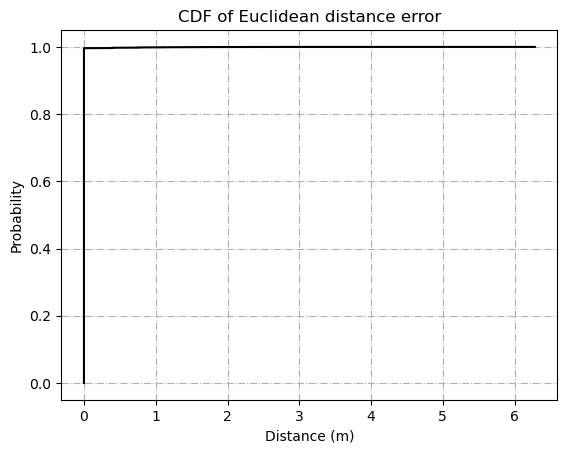

In [96]:
sortedl2_KNN = np.sort(distancesKNN)
prob_KNN = 1. * np.arange(len(sortedl2_KNN))/(len(sortedl2_KNN) - 1)
fig, ax = plt.subplots()
lg1, = ax.plot(sortedl2_KNN, prob_KNN, color='black')
plt.title('CDF of Euclidean distance error')
plt.xlabel('Distance (m)')
plt.ylabel('Probability')
plt.grid(True)
gridlines = ax.get_xgridlines() + ax.get_ygridlines()
for line in gridlines:
    line.set_linestyle('-.')

## Decision Tree Regresor

In [99]:
modelDTR = DecisionTreeRegressor()
modelDTR.fit(train_x_avg, train_y_avg)
predDTR = modelDTR.predict(test_x_avg)
print('R2 Score: ', r2_score(test_y_avg, predDTR), 
      '\n', 'MSE: ', mean_squared_error(test_y_avg, predDTR))

R2 Score:  0.9968100879516826 
 MSE:  0.014735059138585142


In [100]:
distDTR_mean, distancesDTR = l2Distance((test_y_avg['x'].values, test_y_avg['y'].values), (predDTR[:,0], predDTR[:,1]))
print('Media de las distancias entre predicciones y valores reales',distDTR_mean)

Media de las distancias entre predicciones y valores reales 0.010146948603777337
